In [1]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [10]:
# Specify the height and width of the images.
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

# Specify the number of frames (images) in a sequence.
SEQUENCE_LENGTH = 15

# Specify the directory containing your dataset of images.
DATASET_DIR = r"E:\Anomaly detection"
 
# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
CLASSES_LIST = ["Abuse","Arson","Arrest","Explosion","Fighting" ,"RoadAccidents", "Robbery","Shooting","Shoplifting" ,"Stealing"]

In [11]:
def load_images(class_name):
    images_list = []
    class_dir = os.path.join(DATASET_DIR, class_name)
    image_files = os.listdir(class_dir)
    image_files.sort()

    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_image = resized_image / 255.0
        images_list.append(normalized_image)

    return images_list

In [12]:
def create_dataset():
    features = []
    labels = []

    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'Loading data for class: {class_name}')
        images = load_images(class_name)

        for i in range(0, len(images) - SEQUENCE_LENGTH + 1, SEQUENCE_LENGTH):
            sequence = images[i:i+SEQUENCE_LENGTH]
            features.append(sequence)
            labels.append(class_index)
    np.save('features.npy', features)
    np.save('labels.npy' , labels)

    return np.array(features), np.array(labels)


In [13]:
features, labels = create_dataset()

Loading data for class: Abuse


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'E:\\Anomaly detection\\Abuse'

In [7]:
features.shape, labels.shape
labels

array([0, 0, 0, ..., 9, 9, 9])

In [8]:
import numpy as np

# Assuming you have a NumPy array 'labels' with shape (6394,)
labels = labels.reshape((labels.shape[0], 1))


In [9]:
labels.shape

(19330, 1)

In [10]:
one_hot_encoded_labels = to_categorical(labels)

In [11]:
one_hot_encoded_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

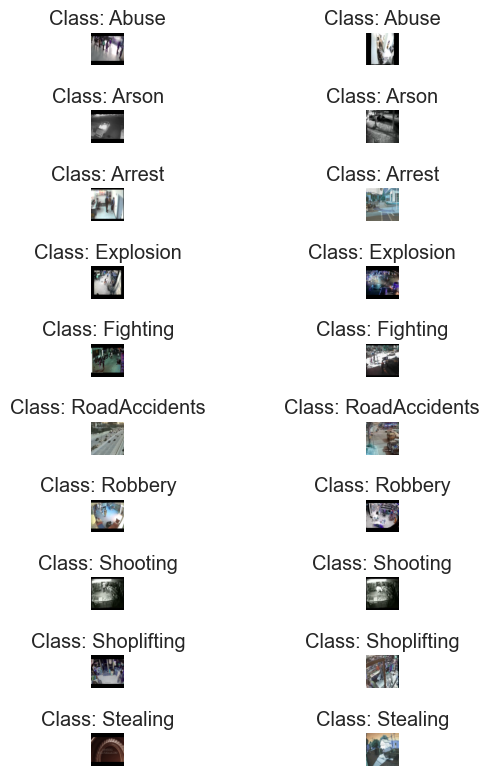

In [25]:
# Create subplots for each class
num_classes = len(CLASSES_LIST)
num_frames_to_show = 2  # Number of frames to show from each class

fig, axes = plt.subplots(num_classes, num_frames_to_show, figsize=(8, 8))

for i, class_name in enumerate(CLASSES_LIST):
    # Find indices of samples from the current class
    class_indices = np.where(labels == i)[0]
    random_indices = random.sample(list(class_indices), min(num_frames_to_show, len(class_indices)))
    
    for j, idx in enumerate(random_indices):
        ax = axes[i][j]
        ax.imshow(features[idx][0])  # Display the first frame of the sequence
        ax.set_title(f'Class: {class_name}')
        ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, one_hot_encoded_labels, test_size=0.25, shuffle=True, random_state=42)

In [13]:
features_train.shape , features_test.shape

((14497, 15, 64, 64, 3), (4833, 15, 64, 64, 3))

In [14]:
labels_train.shape , labels_test.shape

((14497, 10), (4833, 10))

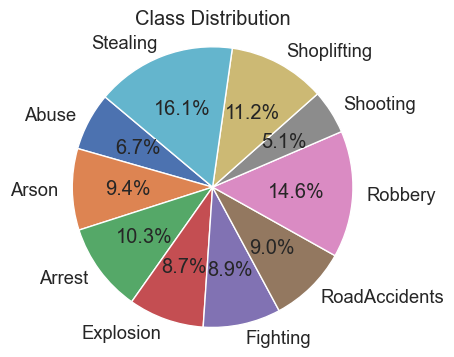

In [30]:
# Count the number of samples for each class using one_hot_encoded_labels
class_counts = [np.sum(one_hot_encoded_labels[:, i]) for i in range(len(CLASSES_LIST))]

# Specify class labels
class_labels = CLASSES_LIST

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set title
plt.title('Class Distribution')

# Show the pie chart
plt.show()

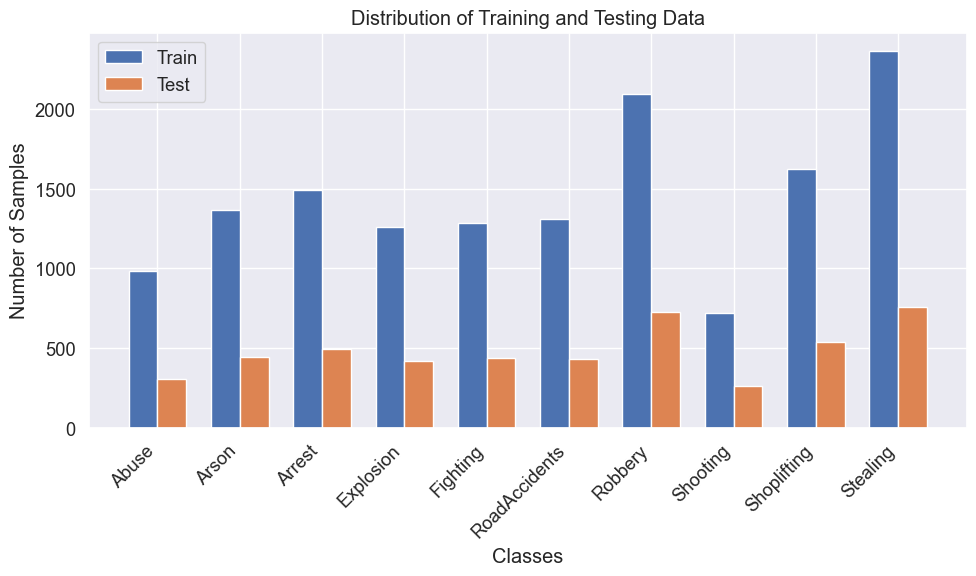

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already split your data into train and test sets
# using features_train, features_test, labels_train, and labels_test

# Count the number of samples for each class in the training and testing sets
train_class_counts = [np.sum(labels_train[:, i]) for i in range(len(CLASSES_LIST))]
test_class_counts = [np.sum(labels_test[:, i]) for i in range(len(CLASSES_LIST))]

# Create an array for class indices
class_indices = np.arange(len(CLASSES_LIST))

# Set the width of the bars
bar_width = 0.35

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for training and testing data
train_bars = ax.bar(class_indices - bar_width/2, train_class_counts, bar_width, label='Train')
test_bars = ax.bar(class_indices + bar_width/2, test_class_counts, bar_width, label='Test')

# Set labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Samples')
ax.set_title('Distribution of Training and Testing Data')
ax.set_xticks(class_indices)
ax.set_xticklabels(CLASSES_LIST, rotation=45, ha="right")
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


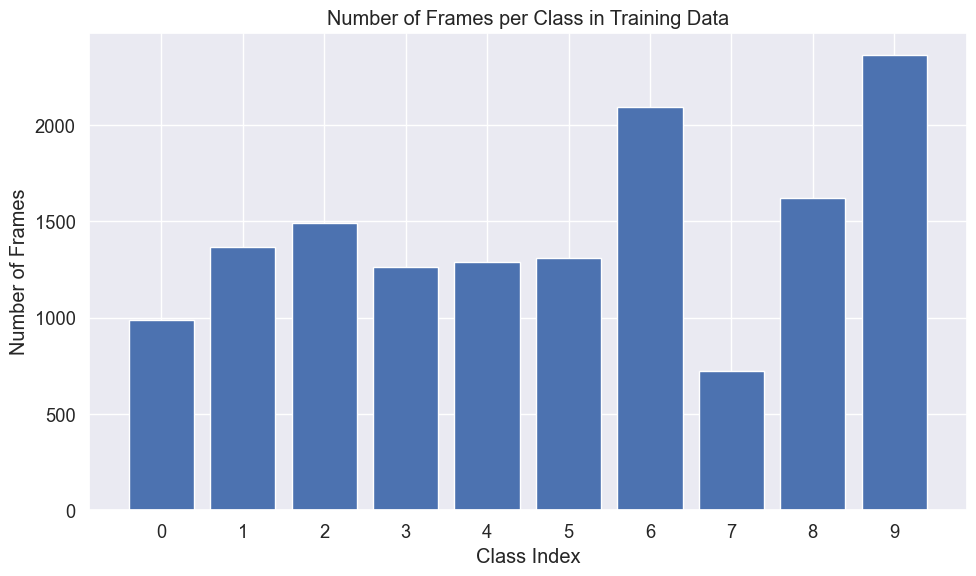

In [28]:
# Count the number of samples for each class in the training set
train_class_counts = [np.sum(labels_train[:, i]) for i in range(len(CLASSES_LIST))]

# Create an array for class indices
class_indices = np.arange(len(CLASSES_LIST))

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_indices, train_class_counts, tick_label=class_indices)

# Set labels and title
plt.xlabel('Class Index')
plt.ylabel('Number of Frames')
plt.title('Number of Frames per Class in Training Data')

# Show the plot
plt.tight_layout()
plt.show()

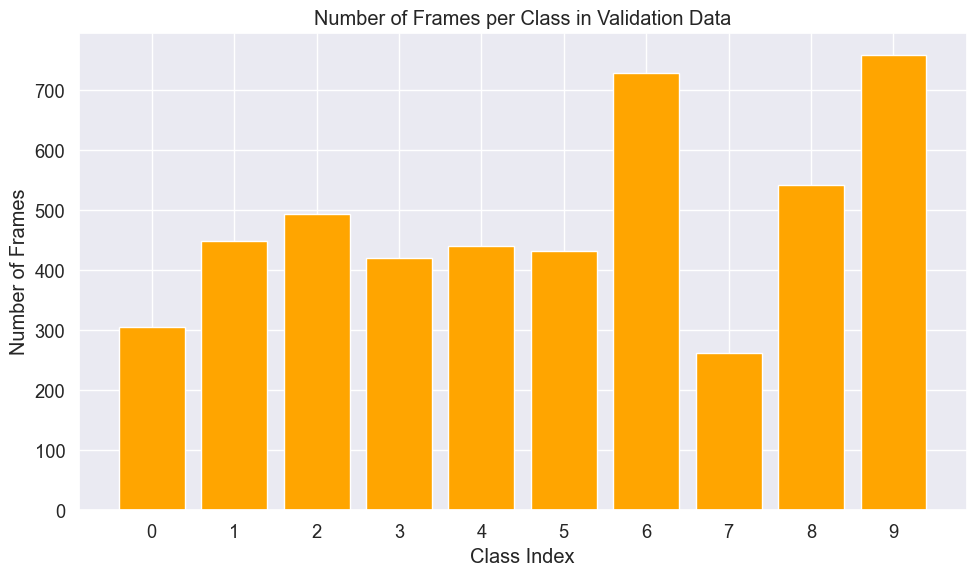

In [29]:
# Count the number of samples for each class in the validation set
validation_class_counts = [np.sum(labels_test[:, i]) for i in range(len(CLASSES_LIST))]

# Create an array for class indices
class_indices = np.arange(len(CLASSES_LIST))

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_indices, validation_class_counts, tick_label=class_indices, color='orange')

# Set labels and title
plt.xlabel('Class Index')
plt.ylabel('Number of Frames')
plt.title('Number of Frames per Class in Validation Data')

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [16]:
LRCN_model = create_LRCN_model()

print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 15, 64, 64, 16)   448       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 15, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 15, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 15, 16, 16, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 15, 4, 4, 32)     0

In [17]:
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

In [18]:
# Start training the model.
LRCN_model_training_history = LRCN_model.fit(
    x=features_train, y=labels_train, epochs=50, batch_size=16,
    shuffle=True, validation_split=0.2)

Epoch 1/50
725/725 [==============================] - 2169s 3s/step - loss: 1.8625 - accuracy: 0.3409 - val_loss: 1.4199 - val_accuracy: 0.5310
Epoch 2/50
725/725 [==============================] - 157s 216ms/step - loss: 1.1472 - accuracy: 0.6282 - val_loss: 0.9036 - val_accuracy: 0.7231
Epoch 3/50
725/725 [==============================] - 146s 202ms/step - loss: 0.7339 - accuracy: 0.7711 - val_loss: 0.6208 - val_accuracy: 0.8169
Epoch 4/50
725/725 [==============================] - 145s 200ms/step - loss: 0.4869 - accuracy: 0.8513 - val_loss: 0.4125 - val_accuracy: 0.8717
Epoch 5/50
725/725 [==============================] - 146s 201ms/step - loss: 0.3367 - accuracy: 0.8981 - val_loss: 0.3269 - val_accuracy: 0.9055
Epoch 6/50
725/725 [==============================] - 145s 200ms/step - loss: 0.2525 - accuracy: 0.9237 - val_loss: 0.2669 - val_accuracy: 0.9241
Epoch 7/50
725/725 [==============================] - 145s 200ms/step - loss: 0.1866 - accuracy: 0.9446 - val_loss: 0.2250 - v

In [19]:
# Evaluate the trained model.
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

152/152 [==============================] - 25s 135ms/step - loss: 0.1305 - accuracy: 0.9712


In [20]:
# Save the trained model
LRCN_model.save("LSTM.h5")
print("Model saved as LSTM.h5")

Model saved as LSTM.h5


In [21]:
# Define function to plot metrics
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label=metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label=metric_name_2)
    plt.title(str(plot_name))
    plt.legend()


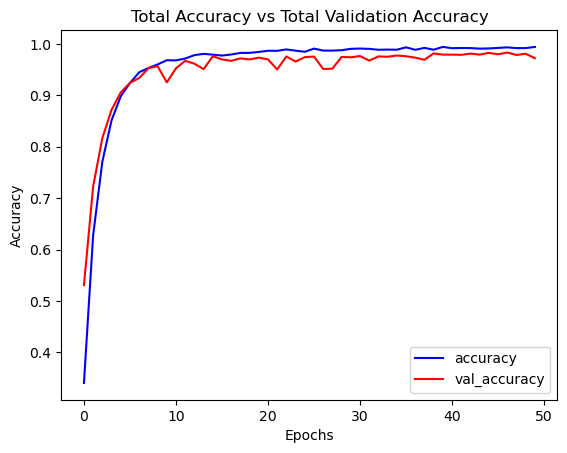

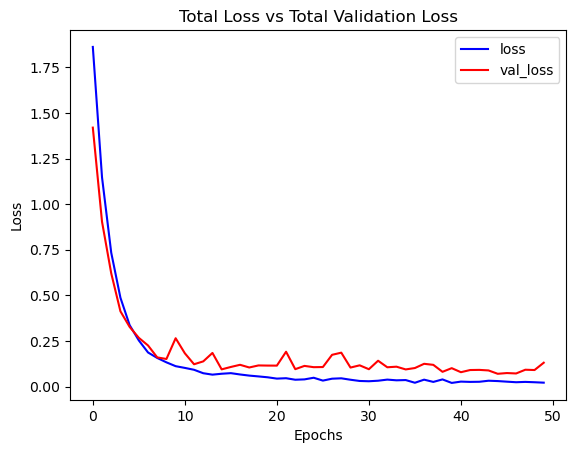

In [22]:
# Plot accuracy and validation accuracy metrics
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.savefig('ACCURACY1.PNG')
plt.show()

# Plot loss and validation loss metrics
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.savefig('Loss1.png')
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set using the trained model
predictions = LRCN_model.predict(features_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test, axis=1)

# Calculate the F1 Score, Precision, and Recall
classification_rep = classification_report(true_labels, predicted_labels, target_names=CLASSES_LIST)

# Calculate the Confusion Matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

print("Classification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mtx)


152/152 [==============================] - 50s 122ms/step
Classification Report:
                precision    recall  f1-score   support

        Abuse       0.98      0.98      0.98       306
        Arson       0.99      0.96      0.97       448
       Arrest       0.97      0.96      0.96       494
    Explosion       0.97      0.97      0.97       421
     Fighting       0.93      0.99      0.96       441
RoadAccidents       0.97      0.96      0.97       432
      Robbery       0.98      0.96      0.97       729
     Shooting       0.90      0.96      0.93       262
  Shoplifting       0.99      0.98      0.98       542
     Stealing       1.00      0.98      0.99       758

     accuracy                           0.97      4833
    macro avg       0.97      0.97      0.97      4833
 weighted avg       0.97      0.97      0.97      4833


Confusion Matrix:
 [[300   1   0   2   1   1   0   1   0   0]
 [  1 429   4   4   3   0   2   5   0   0]
 [  0   1 472   1  10   1   1   7   1  

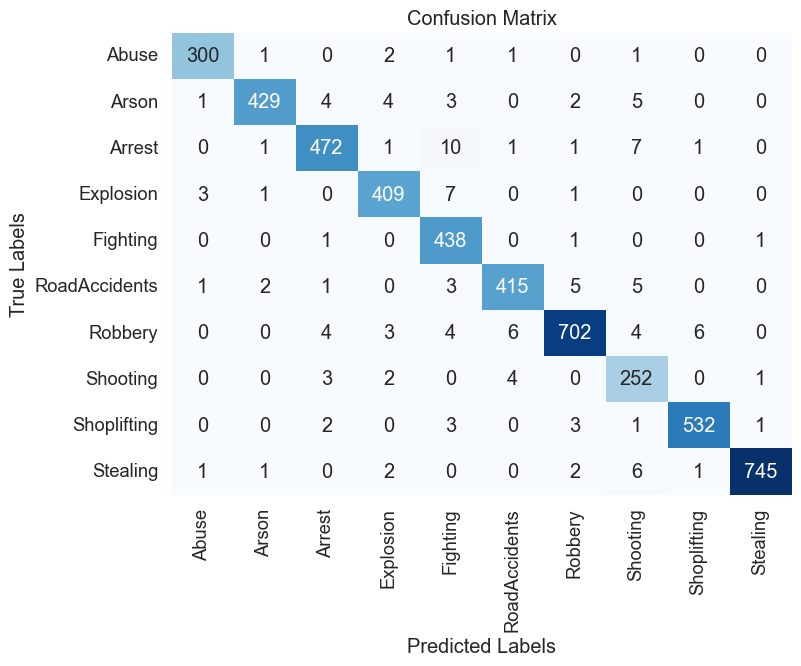

In [24]:
import seaborn as sns

# Define the labels for the confusion matrix
class_labels = CLASSES_LIST

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()